# Metoda spadku gradientu (gradient descent)

Mamy problem optymalizacyjny: szukamy parametru $\theta$, dla którego funkcja $f(\theta)$ przyjmuje wartość najmniejszą.

Algorytm:

Iteracyjnie poprawiamy wartość parametru według wzoru:

$$\theta_{new} = \theta_{old} - learning\_rate * \frac{df}{d\theta}$$

Dlaczego tak?
- gdy funkcja dla danego $\theta$ jest rosnąca, to pochodna jest dodatnia, więc przesumamy się w lewo,
- gdy funkcja dla danego $\theta$ jest malejąca, to pochodna jest ujemna, więc przesumamy się w prawo.

Intuicyjnie: sprawdzamy w którą stronę funkcja maleje i tam się przesuwamy - tym dalej im nachylenie większe.

W przypadku wielowymiarowym - funkcja wielu zmiennych / $\theta$ jest wektorem - zamiast pochodnej mamy gradient: $grad(f) = (\frac{df}{d\theta_1}, ..., \frac{df}{d\theta_k})$.

Algorytm:

1. Ustal punkt startowy $\theta$ oraz prędkość uczenia $lr$
2. Przez ustaloną ilość kroków:
    1. Oblicz pochodną optymalizowanej funkcji w punkcie $\theta$ ($f'(\theta)$)
    2. Zmiennej $\theta$ przypisz wartość $\theta_{new} = \theta - lr \cdot f'(\theta))$

In [7]:
from utils import visualise_gradient_descent

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

def f(x):
    return(x**2 - 6*x + 12)
    
def grad_f(x):
    return(2*x - 6)

In [ ]:
visualise_gradient_descent(f, grad_f, -2)

#### Zadanie: Zaimplementuj algorytm gradient descent zgodnie z następującym szablonem:

```python
def calculate_minimum_gd(f,grad_f,theta, learning_rate):
    """
    
    Argumenty:
    f: funkcja, którą należy zminimalizować. Funkcja przyjmuje dokładnie jeden argument.
    grad_f: pochodna funkcji f. Przyjmuje dokładnie jeden argument.
    theta: punkt początkowy. Liczba rzeczywista
    learning_rate: stała określająca prędkość uczenia. Liczba rzeczywista
    
    Wartość zwracana:
    minimum funkcji f
    """
    
    
    
```

In [28]:
def calculate_minimum_gd(f,grad_f,theta, learning_rate):
    
    for i in range(50):
        theta_new = theta - learning_rate * grad_f(theta)
        theta = theta_new

    return theta_new

In [29]:
calculate_minimum_gd(f,grad_f,-2,0.8)

2.999999999959586

In [30]:
def f(x):
    return(0.5*(x**4 - x**3 - 6*x**2 + 30) )

def grad_f(x):
    return 2*x**3 - 1.5*x**2 - 6*x 


In [31]:
calculate_minimum_gd(f,grad_f,-1,0.3)

-1.227448111635759

### Sztuczne sieci neuronowe

Ciekawe zastosowania:
* https://www.youtube.com/watch?v=JzgOfISLNjk
* https://www.youtube.com/watch?v=qv6UVOQ0F44
* https://medium.com/asap-report/facenet-with-memory-vs-synthetic-faces-8e87a009e139
* https://www.youtube.com/watch?v=dqxqbvyOnMY

<img src="Grafika/neuron.jpg" width="500">

Źródło: https://cdn-images-1.medium.com/max/1600/0*l4ohhbrwQ5MGvmGc.jpg

<br>
<br>

<img src="Grafika/perceptron.gif" width="400">
Źródło: http://blog.zabarauskas.com/img/perceptron.gif

$\sigma(\cdot)$ - funkcja aktywacji

## $\sigma(x) = \frac{1}{1+\exp{(x)}}$

* złożone z grup (warstw) neuronów komunikujących się ze sobą  
* najczęściej stosowane neurony są postaci jak na powyższej grafice - suma neuronów wejściowych przetransformowana jakąś funkcją  
* w przeciwieństwie do prawdziwych neuronów, nie są aktywowane tylko zero-jedynkowo, ale mogą też przyjmować wartości rzeczywiste  

W praktyce popularne są trzy funkcje aktywacji:

- sigmoid
- tangens hiperboliczny
- RELU: $relu(x) = \max{(x,0)}$.

Takie neurony łączymy w większe struktury (warstwy), a warstwy łączymy sekwencyjnie (najczęściej):

<img src="Grafika/MLP.jpg" width="700">
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg


**Uwaga:** "Input layer" pomimo tego, że ma w nazwie słowo "warstwa", to tak naprawdę to nie jest żadna warstwa sieci... To są po prostu dane wejściowe... Niestety przyjęło się literaturze nazywanie tego w ten sposób, co jest mylące :(

## Wizualizacja obszarów decyzyjnych w zależności od liczby neuronów

### (sieć jednowarstwowa)

<img src="Grafika/nn-from-scratch-hidden-layer-varying-655x1024.png" width="700">
Źródło: http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png

<br>

### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. 

Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża). W praktyce rzeczywiście z reguły wystarcza jedna warstwa, ale mimo wszystko zawsze warto sprawdzić czy 2 (lub 3) nie zadziałają przypadkiem lepiej. Przy czym jeżeli dla dwóch warstw jest gorzej, to nie ma sensu sprawdzać dla trzech.

**Ogólny wzór na wartość aktywacji jednego neuronu:**


$$ \sigma\left(\sum\limits_{i=1}^{n} x_i w_i + b \right) $$

### Gradient descent w sieciach neuronowych

W dużym uproszczeniu, w uczeniu maszynowym chcemy zminimalizować funkcję straty budowanego modelu na naszym zbiorze treningowym. Funkcja ta zależy od parametrów modelu oraz od samego zbioru.  
Możemy więc podejść do problemu za pomocą metody *gradient descent* - dla zadanych parametrów modelu policzmy funkcję straty oraz jej pochodną po odpowiednich parametrach. Wtedy będziemy w stanie zaktualizować nasze parametry tak, aby błąd na zbiorze treningowym zmalał.

$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta = \theta - learning\_rate * \frac{dCost}{d\theta}$$


In [32]:
import numpy as np

Nasz model:

$$ \hat{y_i} = w_0 \cdot x_{i, 0} + w_1 \cdot x_{i, 0} + b $$  

<br>

Widzimy, że jest to prosta sieć neuronowa z jednym neuronem oraz liniową aktywacją na końcu.

Rozwiązujemy problem regresyjny - a więc naszą funkcją straty będzie MSE:

$$ L(\hat{y}, y) = \frac{1}{n} \sum\limits_{i=1}^n (\hat{y_i} - y_i)^2 $$

Zgodnie z modelem możemy zapisać naszą funkcję straty w następujący sposób:

$$ L(\hat{y}, y) = \frac{1}{n} \sum\limits_{i=1}^n (w_0 \cdot x_{i, 0} + w_1 \cdot x_{i, 0} + b - y_i)^2 $$

Zgodnie z algorytmem *gradient descent*, musimy policzyć pochodne funkcji $L$ po $w_0$, $w_1$, $b$.

$$
\frac{\partial L}{\partial w_0} = \frac{1}{n} \sum\limits_{i=1}^n 2 \cdot (w_0 \cdot x_{i, 0} + w_1 \cdot x_{i, 0} + b - y_i) \cdot x_{i, 0}  = \frac{1}{n} \sum\limits_{i=1}^n 2 \cdot (\hat{y_i} - y_i) \cdot x_{i, 0}$$

$$
\frac{\partial L}{\partial w_1} = \frac{1}{n} \sum\limits_{i=1}^n 2 \cdot (w_0 \cdot x_{i, 0} + w_1 \cdot x_{i, 0} + b - y_i) \cdot x_{i, 1}  = \frac{1}{n} \sum\limits_{i=1}^n 2 \cdot (\hat{y_i} - y_i) \cdot x_{i, 1}$$

$$
\frac{\partial L}{\partial b} = \frac{1}{n} \sum\limits_{i=1}^n 2 \cdot (w_0 \cdot x_{i, 0} + w_1 \cdot x_{i, 0} + b - y_i) \cdot 1  = \frac{1}{n} \sum\limits_{i=1}^n 2 \cdot (\hat{y_i} - y_i)$$

In [33]:
# wygenerujmy dane
X = np.random.normal(size=(1000, 2))
w_true = np.array([2, -3])
y = X[:, 0] * w_true[0] + X[:, 1] * w_true[1] + 1.45  + np.random.normal(scale=0.1, size=(1000, ))

In [35]:
import seaborn
import matplotlib.pyplot as plt

In [36]:
w = np.array([0.,0.])
print(len(np.dot(X,w) + 1))
print(len(y))

1000
1000


[ 1.99703295 -2.99736375] 1.4482188992927205


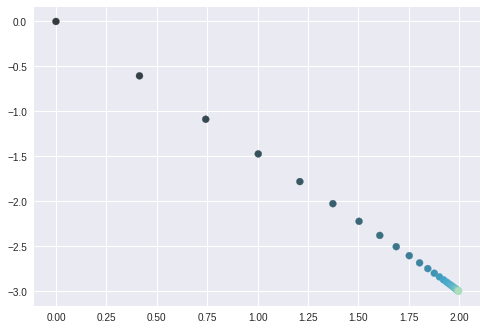

In [38]:
NUM_EPOCHS = 30

w = np.array([0.,0.]) # w_0, w_1
b = 0.
learning_rate = 0.1
n = len(y)

w_history = []

for i in range(NUM_EPOCHS):
    
    w_history.append(w.copy())
    
    # predykcja i liczenie błędu
    
    y_dash = np.dot(X,w) + b
    
    delta_y = y_dash - y
    
    MSE = np.mean(delta_y * delta_y)
    
    # uaktualnienie wag
    
    delta_w = np.array([
                        np.mean(2 * delta_y * X[:,0]), 
                        np.mean(2 * delta_y * X[:,1])
                       ])

                    
    w = w - learning_rate * delta_w
    b = b - learning_rate * np.sum(2 * delta_y)/n
    
print(w, b)

w_data = np.array(w_history)

c = seaborn.color_palette("GnBu_d", NUM_EPOCHS)
plt.scatter(w_data[:, 0], w_data[:, 1], c=c)
plt.show()

** Zadanie ** . Sprawdź, czy da się znaleźć takie punkty początkowe, dla których algorytm nie zbiegnie (albo będzie to dla niego trudne).

In [39]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

        

class Perceptron(object):

    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.array([10., 1.])
        self.b = -50
        self.errors_ = []
        
        for i in range(self.epochs):
            
            plt.figure(figsize=(5,5))
        
            errors = 0
            
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
                self.w_ +=  update * xi
                self.b +=  update
                errors += int(update != 0.0)
                
            plt.scatter(X[:,0],X[:,1],c=y)
            plt.plot(np.linspace(4,7,100),-1 * (self.b+self.w_[0]*np.linspace(4,7,100))/self.w_[1])
            plt.title('Perceptron')
            plt.xlabel('sepal length [cm]')
            plt.ylabel('petal length [cm]')
            plt.xlim(4,7)
            plt.ylim(-1,6)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)

            self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

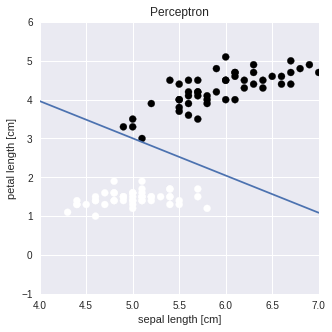

In [40]:
import pandas as pd

df = pd.read_csv('Dane/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

ppn = Perceptron(epochs=20, eta=0.15)
ppn.train(X, y)